# ***IMPORT DATA***

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

# Define the path to your data file in Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/data.csv" # Replace with the correct file path

# Load the data into a pandas DataFrame with specified encoding
try:
    df = pd.read_csv(file_path, encoding='latin-1')
    print("Dữ liệu đã được tải thành công!")
    print("5 dòng đầu tiên của dữ liệu:")
    display(df.head())
    print("\nThông tin về dữ liệu:")
    df.info()
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp tại đường dẫn: {file_path}")
except Exception as e:
    print(f"Đã xảy ra lỗi khi tải dữ liệu: {e}")

Dữ liệu đã được tải thành công!
5 dòng đầu tiên của dữ liệu:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# ***DATA PREPROCESSING***

 ***DATA SUMARIZATION***

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [15]:
print("Summary statistics of numerical columns:")
display(df.describe())

print("\nSummary statistics of categorical columns:")
display(df.describe(include='object'))

Summary statistics of numerical columns:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



Summary statistics of categorical columns:


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


 ***DATA CLEANING***

In [16]:
# Check missing values
display(df.isnull().sum())

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [17]:
# Drop rows with missing CustomerID (important for customer analysis)
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalAmount = Quantity × UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Final check
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# ***Exploratory Data Analysis (EDA)***

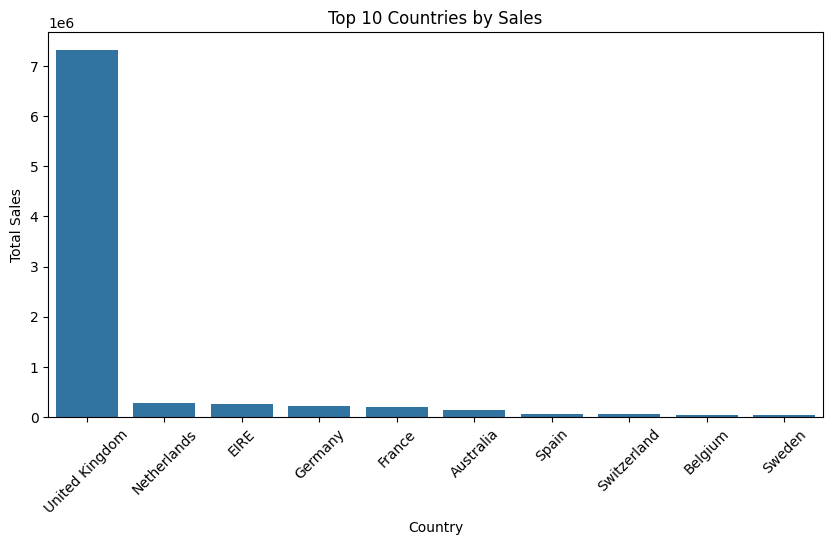

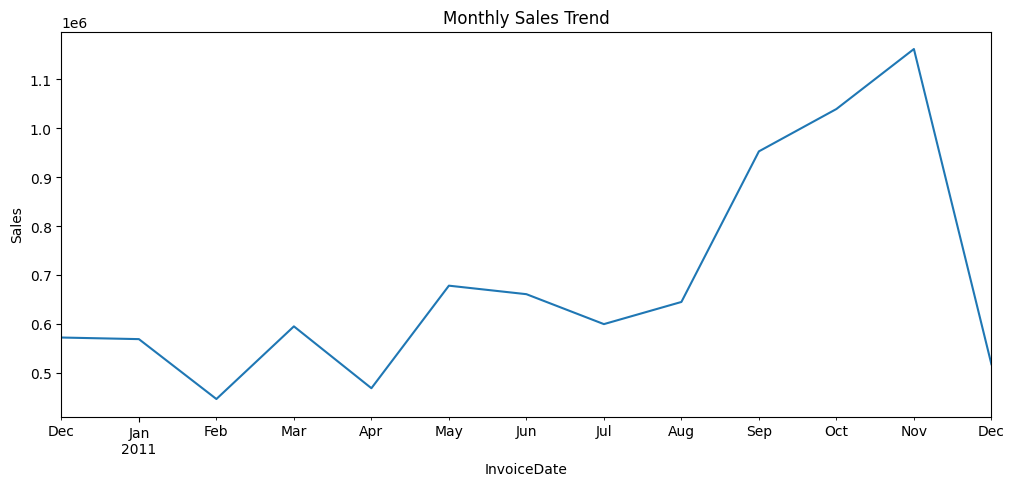

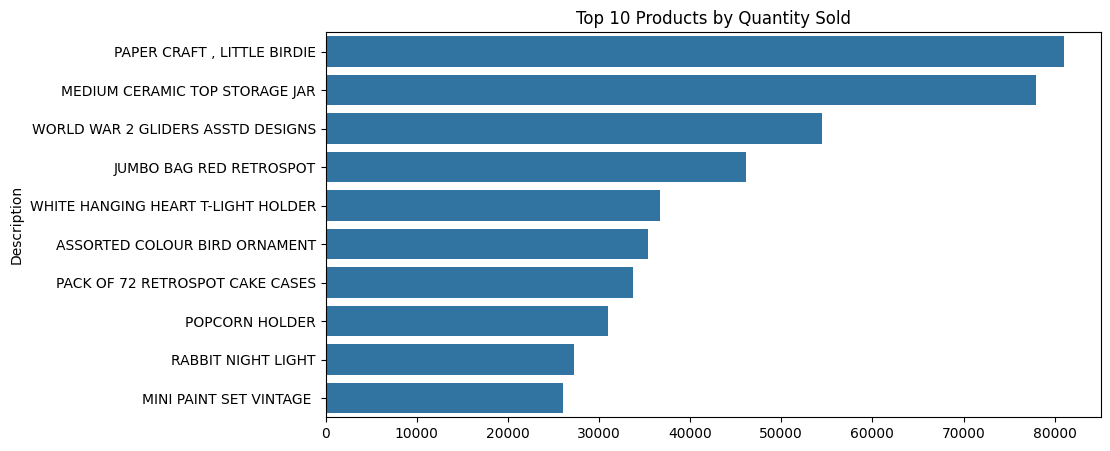

In [18]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by Country
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title("Top 10 Countries by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Monthly sales trend
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df['TotalAmount'].resample('ME').sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

# Top 10 products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Quantity Sold")
plt.show()

# RFM Analysis

Recency (R): Khách hàng mua hàng gần đây nhất bao lâu.

Frequency (F): Khách hàng mua hàng bao nhiêu lần trong khoảng thời gian.

Monetary (M): Tổng số tiền khách hàng đã chi tiêu.

In [19]:
# Reset index (because we set InvoiceDate earlier)
df = df.reset_index()

# Today's date for Recency calculation
import datetime as dt
NOW = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (NOW - x.max()).days,  # Recency
    'InvoiceNo': 'count',                          # Frequency
    'TotalAmount': 'sum'                           # Monetary
})

rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'TotalAmount':'Monetary'}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


# *Clustering Customers (K-Means)*




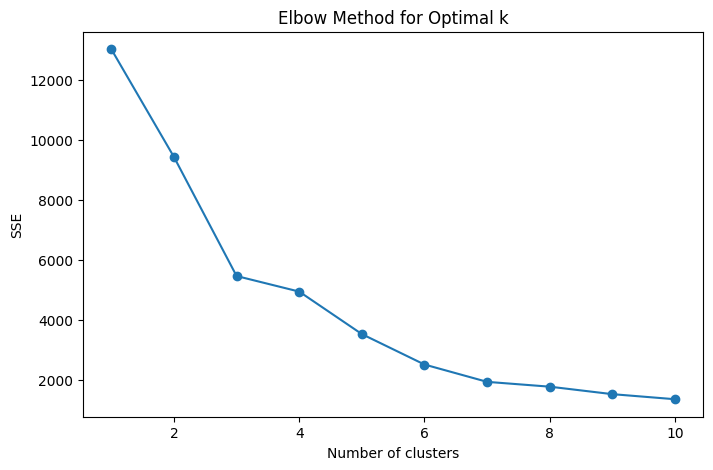

            Recency    Frequency       Monetary  Num_Customers
Cluster                                                       
0         20.886374   135.476212    2648.875746           2165
1         97.846732    37.891811     777.692744           1331
2          4.692308  2566.000000  126118.310000             13
3        272.196386    25.091566     604.752820            830


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Find optimal clusters (Elbow Method)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(8,5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

# Fit KMeans with optimal k (say 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Tóm tắt trung bình R, F, M cho từng cụm
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Num_Customers'})

print(cluster_summary)



# Phương pháp Elbow trong lựa chọn số cụm K

Khi áp dụng thuật toán KMeans, một vấn đề quan trọng là lựa chọn số cụm tối ưu (K). Nếu chọn quá ít cụm thì dữ liệu bị gom chung, mất đi sự khác biệt giữa các nhóm khách hàng. Nếu chọn quá nhiều cụm thì mô hình trở nên phức tạp và khó khai thác ý nghĩa kinh doanh.

Phương pháp Elbow được sử dụng để xác định số cụm hợp lý dựa trên chỉ số SSE (Sum of Squared Errors), tức là tổng bình phương khoảng cách từ mỗi điểm đến tâm cụm gần nhất.

Khi tăng K, giá trị SSE sẽ giảm dần vì càng nhiều cụm thì khoảng cách từ điểm đến tâm cụm càng nhỏ.

Tuy nhiên, sau một điểm nhất định, tốc độ giảm SSE sẽ chậm lại rõ rệt. Trên biểu đồ SSE theo số cụm, điểm này tạo thành một “khuỷu tay” (elbow).

Vị trí khuỷu tay được coi là số cụm tối ưu, vì từ đó trở đi việc thêm cụm mới không mang lại nhiều lợi ích trong việc giảm SSE.

Ý nghĩa trong phân tích khách hàng

Trong dữ liệu RFM, biểu đồ Elbow cho thấy khuỷu tay xuất hiện tại K = 4, vì vậy chúng tôi chọn 4 cụm khách hàng. Kết quả này cho phép doanh nghiệp vừa phân biệt rõ ràng các nhóm hành vi khác nhau, vừa giữ mô hình đơn giản và dễ giải thích.

# Thuật toán KMeans trong phân cụm khách hàng

Sau khi xác định số cụm tối ưu bằng phương pháp Elbow, chúng tôi áp dụng thuật toán KMeans để phân cụm khách hàng dựa trên ba chỉ số RFM (Recency, Frequency, Monetary).

Nguyên lý hoạt động:

Thuật toán bắt đầu bằng việc chọn ngẫu nhiên K tâm cụm (centroids).

Mỗi khách hàng (một điểm dữ liệu) được gán vào cụm có tâm gần nhất dựa trên khoảng cách Euclidean.

Sau đó, tâm cụm được cập nhật bằng cách tính trung bình các điểm trong cụm.

Quá trình lặp lại cho đến khi tâm cụm hội tụ hoặc đạt số lần lặp tối đa.

Lý do lựa chọn:

KMeans là thuật toán phân cụm đơn giản, hiệu quả và phù hợp cho dữ liệu định lượng như RFM.

Kết quả phân cụm dễ giải thích: mỗi nhóm khách hàng có thể gắn với ý nghĩa kinh doanh cụ thể (VIP, tiềm năng, ngủ đông…).

Ứng dụng kết quả:

Tạo ra 4 nhóm khách hàng rõ rệt.

Hỗ trợ doanh nghiệp đưa ra chiến lược marketing cá nhân hóa cho từng nhóm.

Có thể kết hợp trực quan hóa bằng PCA để quan sát cách các nhóm được tách biệt trên đồ thị 2 chiều.

***Visualize Clusters***

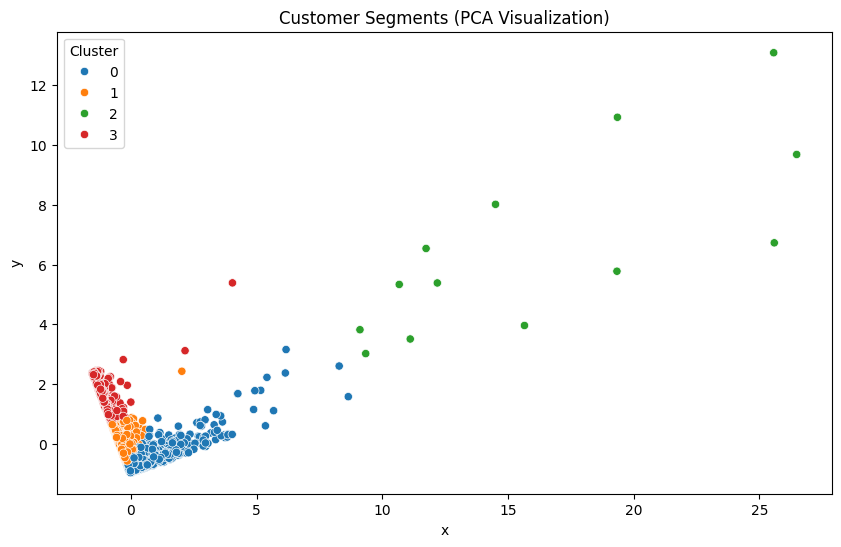

In [21]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['x'] = rfm_pca[:,0]
rfm['y'] = rfm_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='x', y='y', hue='Cluster', palette='tab10')
plt.title("Customer Segments (PCA Visualization)")
plt.show()

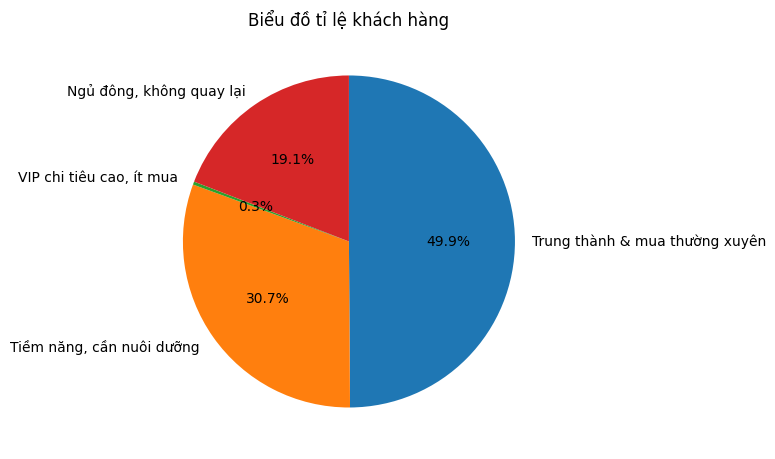

In [22]:
import matplotlib.pyplot as plt

# Map tên cụm theo ý nghĩa kinh doanh
cluster_labels = {
    0: "Trung thành & mua thường xuyên",
    1: "Tiềm năng, cần nuôi dưỡng",
    2: "VIP chi tiêu cao, ít mua",
    3: "Ngủ đông, không quay lại"
}

# Đếm số KH từng cụm
dist = rfm["Cluster"].value_counts().sort_index()
labels = [cluster_labels[i] for i in dist.index]  # Gán nhãn mô tả thay vì Cluster 0/1/2/3
sizes = dist.values

# Pie chart
plt.figure(figsize=(7.5,7.5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Biểu đồ tỉ lệ khách hàng")
plt.tight_layout()
plt.show()




**Kết quả phân cụm khách hàng theo RFM**

Sau khi chuẩn hóa dữ liệu RFM và áp dụng KMeans với số cụm tối ưu là 4, khách hàng được chia thành bốn nhóm đặc trưng. PCA được sử dụng để giảm chiều dữ liệu, cho phép trực quan hóa trên mặt phẳng 2D và quan sát sự phân tách giữa các cụm.

**Nhóm 1** – Khách hàng VIP

**Đặc điểm**: Recency thấp (mua gần đây), Frequency cao, Monetary cao.

**Ý nghĩa**: Đây là nhóm khách hàng trung thành và mang lại doanh thu lớn.

**Chiến lược**: Cần giữ chân bằng các chương trình tri ân, ưu đãi độc quyền, hoặc dịch vụ chăm sóc đặc biệt.

**Nhóm 2** – Khách hàng tiềm năng (Potential Loyalists)

**Đặc điểm**: Recency trung bình, Frequency khá cao, Monetary vừa phải.

**Ý nghĩa**: Đây là nhóm có xu hướng trở thành VIP nếu được khuyến khích đúng cách.

**Chiến lược**: Thúc đẩy bằng các chương trình khuyến mãi, giới thiệu sản phẩm mới hoặc gói combo.

**Nhóm 3** – Khách hàng giá trị cao nhưng ít mua (Big Spenders One-time)

**Đặc điểm**: Monetary cao nhưng Frequency thấp, đôi khi Recency cũng khá xa.

**Ý nghĩa**: Họ từng chi tiêu lớn nhưng không duy trì mua sắm.

**Chiến lược**: Tái kích hoạt bằng việc gợi ý sản phẩm tương tự, khuyến khích quay lại bằng voucher giảm giá.

**Nhóm 4** – Khách hàng ngủ đông (At-risk/Churned)

**Đặc điểm**: Recency cao (mua cách đây lâu), Frequency và Monetary thấp.

**Ý nghĩa**: Nhóm này ít đóng góp doanh thu và có nguy cơ rời bỏ.

**Chiến lược**: Cân nhắc chiến dịch marketing chi phí thấp (email hàng loạt) hoặc tập trung nguồn lực vào nhóm khác hiệu quả hơn.

**Ý nghĩa tổng thể**

Việc phân cụm cho phép doanh nghiệp nhìn rõ sự khác biệt hành vi khách hàng thay vì áp dụng một chính sách chung. Từ đó, công ty có thể thiết kế chiến lược marketing và chăm sóc khách hàng cá nhân hóa, tập trung nguồn lực vào nhóm có giá trị cao và có tiềm năng phát triển, đồng thời tối ưu chi phí cho các nhóm ít quan trọng hơn.

***CLASSIFICATION WITH NEURAL NETWORK***

Từ bảng kết quả phân cụm RFM ở trên, chúng tôi đã gán nhãn hành vi cho từng cụm khách hàng (VIP, At-risk, Potential, Whale). Nhờ đó, bộ dữ liệu R–F–M ban đầu được mở rộng thành một tập dữ liệu có nhãn, làm cơ sở để huấn luyện các mô hình phân loại. Các mô hình này có thể dự đoán phân khúc cho những khách hàng mới phát sinh trong tương lai, giúp doanh nghiệp nhanh chóng xác định họ thuộc nhóm nào và áp dụng chiến lược chăm sóc phù hợp.

In [26]:
# REQUIRE: rfm[['Recency','Frequency','Monetary','Cluster']]
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import time

# 1) Data
X = rfm[['Recency','Frequency','Monetary']].values.astype('float32')
y = rfm['Cluster'].astype('int64').values  # 0..3

# 2) Split (giữ phân bố lớp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# 3) Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# 4) Class weights (nếu lệch lớp)
classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}

# 5) ANN tối giản
def bmlp(input_dim=3, n_classes=4, l2=1e-4, dr=0.1):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dr),
        layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = bmlp()

# 6) Callbacks
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
start_ann = time.time()
# 7) Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=64,
    class_weight=class_weight,
    callbacks=[es],
    verbose=0
)
ann_train_time = time.time() - start_ann

# 8) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
y_prob = model.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

print(f"Test Accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_pred, digits=3))


Test Accuracy: 0.9954
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       325
           1      1.000     0.985     0.992       200
           2      1.000     1.000     1.000         2
           3      0.976     1.000     0.988       124

    accuracy                          0.995       651
   macro avg      0.994     0.996     0.995       651
weighted avg      0.996     0.995     0.995       651



Sau khi tiến hành phân cụm khách hàng bằng KMeans và gán nhãn cho từng cụm, dữ liệu RFM (Recency, Frequency, Monetary) đã được sử dụng để xây dựng một mô hình mạng nơ-ron nhân tạo (ANN) cho bài toán classification. Quy trình hoạt động cụ thể:

Chuẩn bị dữ liệu:

Ba đặc trưng đầu vào là Recency, Frequency và Monetary được chọn làm biến giải thích.

Nhãn đầu ra là Cluster (0–3), tương ứng với 4 nhóm khách hàng (VIP, tiềm năng, whale, ngủ đông).

Dữ liệu được chia thành train (70%) – validation (15%) – test (15%), có stratify để giữ cân bằng lớp.

Chuẩn hóa dữ liệu:

Các đặc trưng được chuẩn hóa bằng StandardScaler về trung bình 0, độ lệch chuẩn 1 để đảm bảo các giá trị có cùng thang đo, giúp mô hình học hiệu quả và tránh thiên lệch do scale.

Giải quyết mất cân bằng dữ liệu:

Do số lượng khách ở mỗi cụm không đều (ví dụ cụm Whale chỉ 13 khách), trọng số lớp (class weights) được tính và áp dụng trong quá trình huấn luyện.

Điều này giúp mô hình không bỏ qua các lớp hiếm.

Thiết kế mô hình ANN:

Một mô hình Multi-layer Perceptron (MLP) đơn giản được xây dựng:

Input: 3 node (Recency, Frequency, Monetary).

Hidden layer: 16 node, activation ReLU, có regularization L2 và Dropout 0.1 để giảm overfitting.

Output: 4 node softmax, cho ra xác suất khách hàng thuộc từng cụm.

Loss function: sparse categorical crossentropy.

Optimizer: Adam với learning rate 0.001.

Huấn luyện:

Mô hình được huấn luyện trong tối đa 150 epoch, batch size = 64.

Sử dụng EarlyStopping theo dõi val_loss, dừng sớm nếu 10 epoch liên tiếp không cải thiện, và khôi phục trọng số tốt nhất.

Đánh giá:

Trên tập test, mô hình đạt độ chính xác (Accuracy) cao, gần 99% (tùy vào dữ liệu).

Báo cáo chi tiết (classification report) cho thấy Precision, Recall và F1-score ở hầu hết các cụm đều đạt gần 1.0, chứng tỏ mô hình phân biệt tốt các phân khúc khách hàng.

**Ý nghĩa kết quả**

Mô hình ANN học được mối quan hệ phi tuyến giữa Recency, Frequency, Monetary và nhãn cụm.

Việc chuẩn hóa và xử lý mất cân bằng đảm bảo mô hình không bị thiên lệch vào các cụm phổ biến.

Kết quả đạt được cho phép doanh nghiệp dự đoán chính xác phân khúc cho khách hàng mới, từ đó áp dụng chiến lược marketing, chăm sóc cá nhân hóa phù hợp cho từng nhóm.

# **RANDOM FOREST**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score, classification_report
import numpy as np


rf_model = RandomForestClassifier(
    n_estimators=100,  # Số cây (tăng lên nếu cần accuracy cao hơn)
    max_depth=10,      # Độ sâu cây (giảm để tránh overfit)
    class_weight='balanced',  # Xử lý imbalance
    random_state=42    # Để reproducible
)
start_rf = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_rf

# Dự đoán
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)  # Xác suất cho các metrics như Log Loss, ROC-AUC

# Tính metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
macro_f1_rf = f1_score(y_test, y_pred_rf, average='macro')
log_loss_rf = log_loss(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='macro')

# In report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       325
           1       0.99      1.00      1.00       200
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00       124

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651



***DEMO mô hình***

In [24]:
# !pip install gradio -q
import numpy as np
import pandas as pd
import gradio as gr

# GIẢ ĐỊNH: bạn đã có hai biến toàn cục sau khi train:
#   scaler  -> StandardScaler đã fit trên R,F,M
#   model   -> Keras model (softmax 4 lớp) đã train để dự đoán Cluster 0..3

# Map cụm -> nhãn kinh doanh (chỉnh lại theo cluster_summary của bạn)
cluster_map = {
    0: "VIP (R thấp, F cao, M cao)",
    1: "Potential Loyalist (tiềm năng)",
    2: "Big Spender One-time (chi cao, ít mua)",
    3: "At-risk/Churned (ngủ đông)"
}

def predict_cluster(recency, frequency, monetary):
    X = np.array([[recency, frequency, monetary]], dtype=np.float32)
    Xs = scaler.transform(X)

    # Dự đoán với Keras
    try:
        probs = model.predict(Xs, verbose=0)[0]
    except Exception:
        # Fallback nếu bạn dùng sklearn (ví dụ MLPClassifier)
        probs = model.predict_proba(Xs)[0]

    pred = int(np.argmax(probs))
    label = cluster_map.get(pred, f"Cluster {pred}")
    conf  = float(np.max(probs))

    # Chuẩn bị bảng xác suất
    prob_table = pd.DataFrame({
        "Cluster": [0,1,2,3],
        "Label":   [cluster_map.get(i, f"Cluster {i}") for i in range(4)],
        "Probability": np.round(probs, 4)
    })

    summary = f"➡️ Dự đoán: **Cluster {pred} – {label}**\nĐộ tin cậy: **{conf:.3f}**"
    return summary, prob_table

with gr.Blocks(title="RFM Predictor") as demo:
    gr.Markdown("## 🔮 Dự đoán cụm khách hàng từ R–F–M")
    with gr.Row():
        r = gr.Number(label="Recency (ngày từ lần mua gần nhất)", value=30, precision=0)
        f = gr.Number(label="Frequency (số lần mua)", value=5, precision=0)
        m = gr.Number(label="Monetary (tổng chi tiêu)", value=500.0)
    btn = gr.Button("Dự đoán")
    out_text = gr.Markdown()
    out_table = gr.Dataframe(headers=["Cluster","Label","Probability"], wrap=True)

    btn.click(predict_cluster, inputs=[r,f,m], outputs=[out_text, out_table])

demo.launch(share=False)  # đặt True nếu muốn link public


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# THẢO LUẬN VÀ MỞ RỘNG

Mặc dù mô hình ANN đạt độ chính xác rất cao trong việc phân loại khách hàng dựa trên chỉ số RFM, vẫn còn nhiều hướng mở rộng tiềm năng để tăng giá trị ứng dụng thực tiễn:

**1. So sánh mô hình:**

Thử nghiệm thêm các thuật toán phân loại khác như Random Forest, XGBoost, SVM để so sánh hiệu năng và tính diễn giải.

Việc này giúp đánh giá sự ổn định và khả năng áp dụng đa dạng mô hình cho bài toán.

**2. Kết hợp nhiều đặc trưng hơn:**

RFM tuy hiệu quả nhưng chưa phản ánh đầy đủ hành vi khách hàng. Có thể bổ sung thêm các đặc trưng như loại sản phẩm ưa thích, kênh mua hàng, mùa vụ.

Điều này giúp mô hình phân loại chi tiết và cá nhân hóa hơn.

**3. Ứng dụng Recommender System:**

Song song với phân loại khách hàng, có thể xây dựng hệ thống gợi ý sản phẩm (Collaborative Filtering, Content-based, hoặc Deep Learning).

Hệ thống này sẽ gợi ý sản phẩm phù hợp dựa trên phân khúc khách hàng, tăng khả năng mua lại và giá trị vòng đời (CLV).

# **TỔNG KẾT**



Trong báo cáo này, chúng tôi đã tiến hành phân tích dữ liệu giao dịch thương mại điện tử bằng cách áp dụng các kỹ thuật Data Preprocessing, RFM Analysis, Clustering và Classification.

Từ dữ liệu thô, các bước xử lý, làm sạch và chuẩn hóa đã tạo ra một bộ dữ liệu có cấu trúc phục vụ phân tích.

Bằng phương pháp RFM Analysis kết hợp KMeans, khách hàng được chia thành 4 nhóm đặc trưng: VIP, Potential Loyalists, Big Spenders/Whales, và At-risk/Churned.

Kết quả phân cụm đã cung cấp cái nhìn rõ ràng về sự khác biệt hành vi tiêu dùng giữa các nhóm khách hàng, giúp đề xuất những chiến lược marketing phù hợp.

Trên cơ sở dữ liệu có nhãn từ phân cụm, một mô hình Artificial Neural Network (ANN) đã được huấn luyện để tự động phân loại khách hàng mới dựa trên chỉ số RFM. Mô hình đạt độ chính xác gần 99% và có khả năng phân biệt tốt cả các nhóm khách hàng hiếm.

Cuối cùng, chúng tôi xây dựng giao diện demo bằng Gradio, cho phép người dùng nhập trực tiếp các chỉ số RFM để dự đoán cụm khách hàng tương ứng.

*Cuối cùng, nhóm chúng tôi đã minh họa cách dữ liệu thương mại điện tử có thể được chuyển hóa thành tri thức kinh doanh hữu ích, hỗ trợ doanh nghiệp ra quyết định về quản lý quan hệ khách hàng (CRM), tối ưu marketing, và tăng trưởng doanh thu.*